## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## Read the data

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Data Cleaning

In [6]:
df.duplicated().sum()                                         # No duplicated values

0

In [7]:
df.isna().sum()                                               # No null values 

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Exploratory Data Analysis

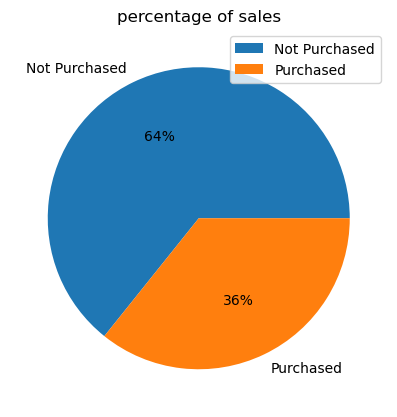

In [8]:
plt.figure(figsize=(5,5),dpi=100)
plt.pie(x=df['Purchased'].value_counts(),labels = ['Not Purchased','Purchased'],autopct = '%0.0f%%', normalize = True)
plt.title('percentage of sales')
plt.legend()
plt.show()

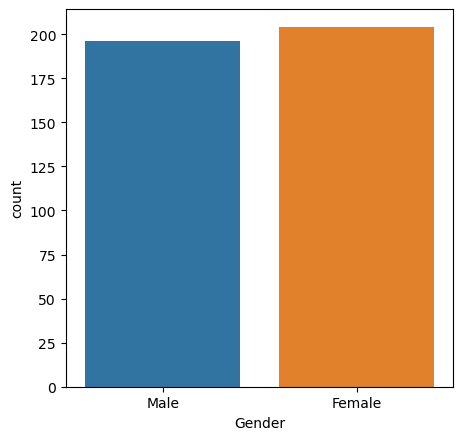

In [9]:
plt.figure(figsize=(5,5),dpi=100)
sns.countplot(df['Gender'])
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

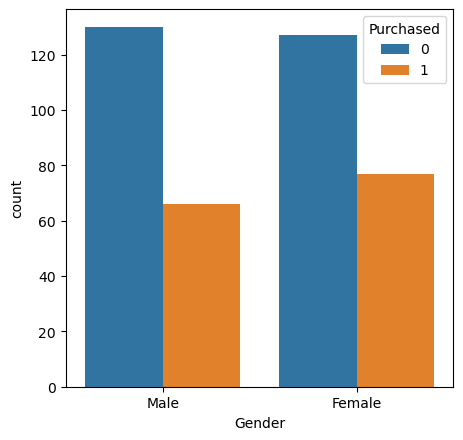

In [10]:
plt.figure(figsize=(5,5),dpi=100)
sns.countplot(hue = df['Purchased'],x = df['Gender'])

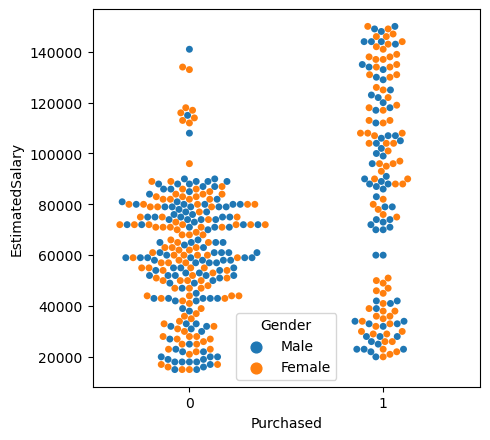

In [11]:
plt.figure(figsize=(5,5),dpi=100)
sns.swarmplot(df['Purchased'],df['EstimatedSalary'],hue = df['Gender'])
plt.show()

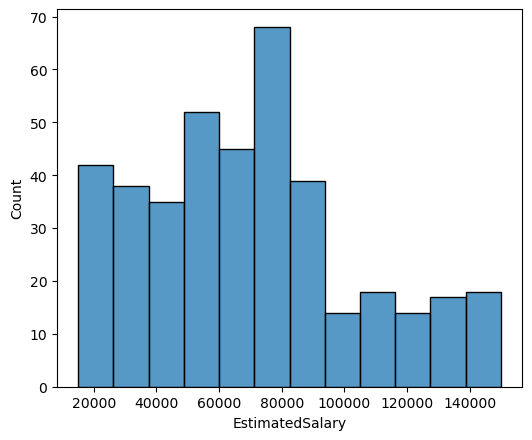

In [12]:
plt.figure(figsize=(6,5),dpi=100)
sns.histplot(df['EstimatedSalary'])
plt.show()

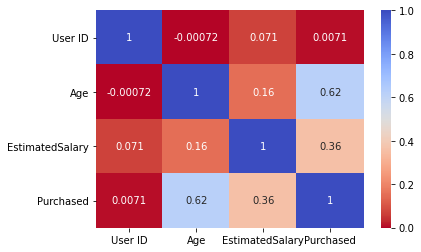

In [13]:
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm_r')
plt.show()

## Convertion of categorical column into numerical column

In [14]:
df['Gender'] = df['Gender'].map({'Male':1 , 'Female':0})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


## Feature Selection

In [15]:
X = df.iloc[:,1:-1]
Y = df[['Purchased']]

## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col = ['Age','EstimatedSalary']
X[col] = sc.fit_transform(X[col])

## Splitting the dataset

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 5)

## Model training

In [18]:
from sklearn.linear_model import LogisticRegression
cl = LogisticRegression()
cl.fit(x_train,y_train)   
print('The score for logistic regression is : ',cl.score(x_train,y_train))

The score for logistic regression is :  0.85


In [19]:
from sklearn.naive_bayes import GaussianNB
cls = GaussianNB()
cls.fit(x_train,y_train)

GaussianNB()

In [20]:
print('The score for Gaussian Naive Bayes is : ',cls.score(x_train,y_train))

The score for Gaussian Naive Bayes is :  0.8966666666666666


### Observation : GaussianNB giving high score 

In [21]:
y_pred_test = cls.predict(x_test)

In [22]:
from sklearn.metrics import f1_score
print('The f1 score is : ',f1_score(y_test,y_pred_test))

The f1 score is :  0.8307692307692308


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)

In [24]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,                                    # A method for plotting the confusion matrix
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


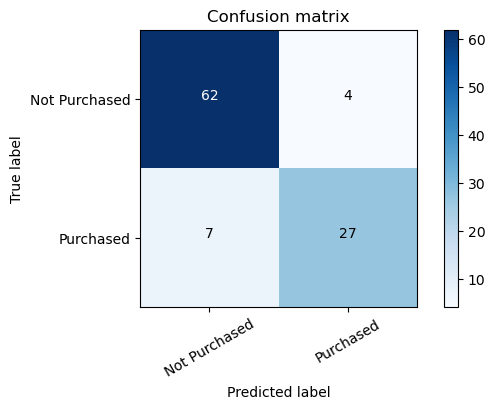

In [25]:
plt.figure(dpi = 100)
plot_confusion_matrix(cm, classes = ['Not Purchased', 'Purchased'])